# Project Report (Canadian Community Well-Being Index)

## Introduction:



## Preliminary Exploratory Data Analysis
Note that we have imported and built up the data frame and some function in the Jupyter notebook, here are our steps.

### Importing Packages

Before we look at the dataset, we need to first import the packages and libraries we need.

In [34]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ISLR)
library(cowplot)
library(GGally)


### Reading Dataset

We have stored the dataset into a csv file, and import the file into Jupyter Notebook for analysis. We directly used the function read_csv to view the csv file downloaded.

Some of the observations are not including certain information, therefore, we use function "filter" to remove these observations beforing actually analyzing, and obtain a clean data frame.

In [35]:
raw_data <- read_csv("CWB_2021.csv")

database <- raw_data |>
            filter(Census_Population_2021 != "NA") |>
            filter(Income_2021 != "NA") |>
            filter(Education_2021 != "NA") |>
            filter(Housing_2021 != "NA") |>
            filter(Labour_Force_Activity_2021 != "NA") |>
            filter(CWB_2021 != "NA")

head(database)

Rows: 5161 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): CSD_Name_2021, Community_Type_2021
dbl (7): CSD_Code_2021, Census_Population_2021, Income_2021, Education_2021,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CSD_Code_2021 CSD_Name_2021            Census_Population_2021 Income_2021
1 1001113       Trepassey                 405                   76         
2 1001124       Division No.  1, Subd. U 1373                   81         
3 1001126       Cape Broyle               499                   78         
4 1001131       Renews-Cappahayden        280                   79         
5 1001149       Ferryland                 371                   83         
6 1001155       Division No.  1, Subd. W  469                   78         
  Education_2021 Housing_2021 Labour_Force_Activity_2021 CWB_2021
1 48             97           70                         73      
2 63             98           77                         80      
3 57             97           74                         77      
4 59             94           72                         76      
5 56             96           68                         76      
6 58             99           69                         76      
  Community_Type_2021     
1 Non-Indigenous Community
2 Non-Indigenous Community
3 Non-Indigenous Community
4 Non-Indigenous Community
5 Non-Indigenous Community
6 Non-Indigenous Community

### General View of the Data

Now the first several rows of the data has been shown, and it seems well-organized and tidy. Since the goal is to predict the CWB index by 4 predictors (income, education, housing, labour force), we need to have a glance at each of the variables for a deeper insight.

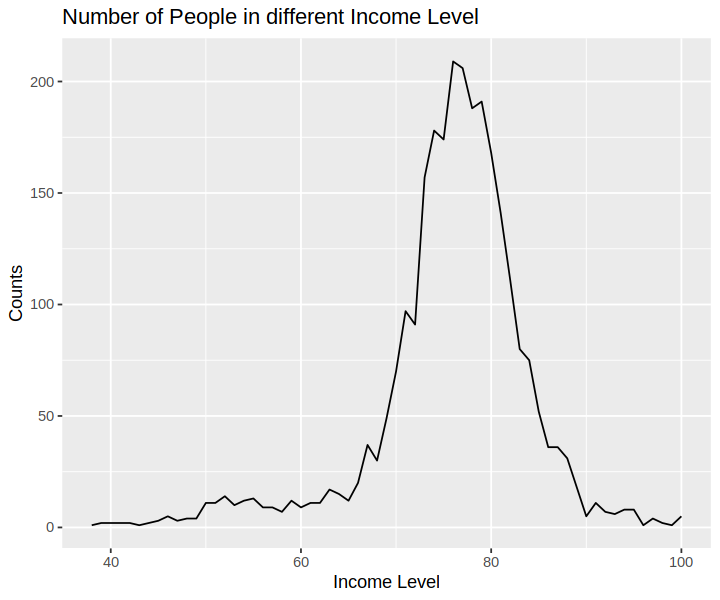

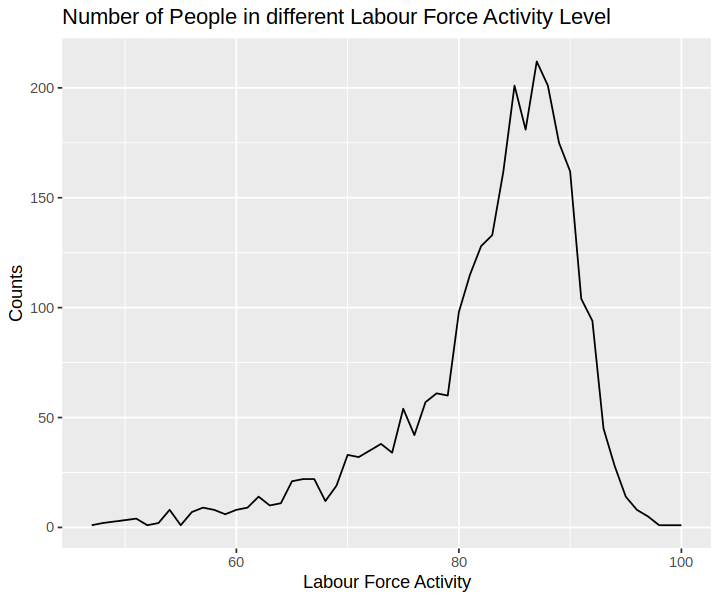

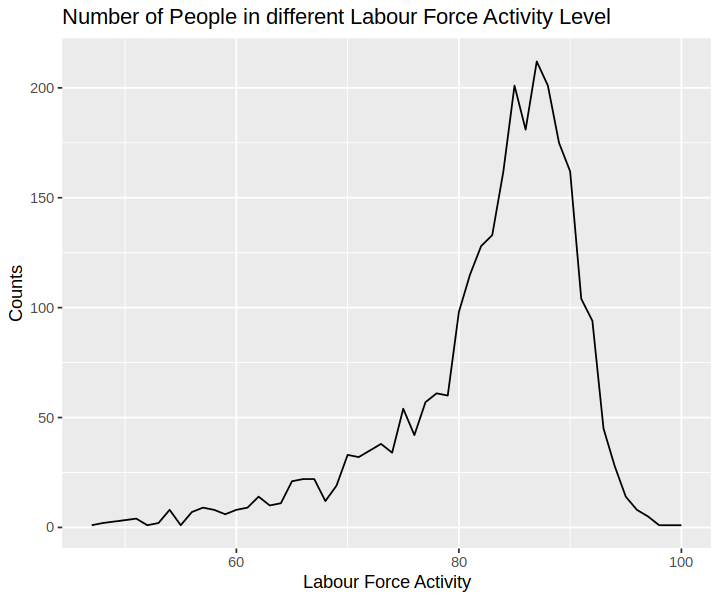

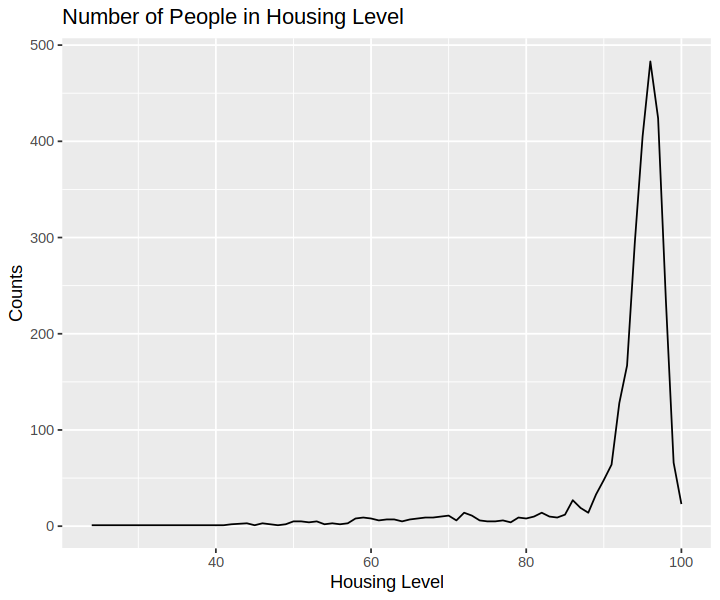

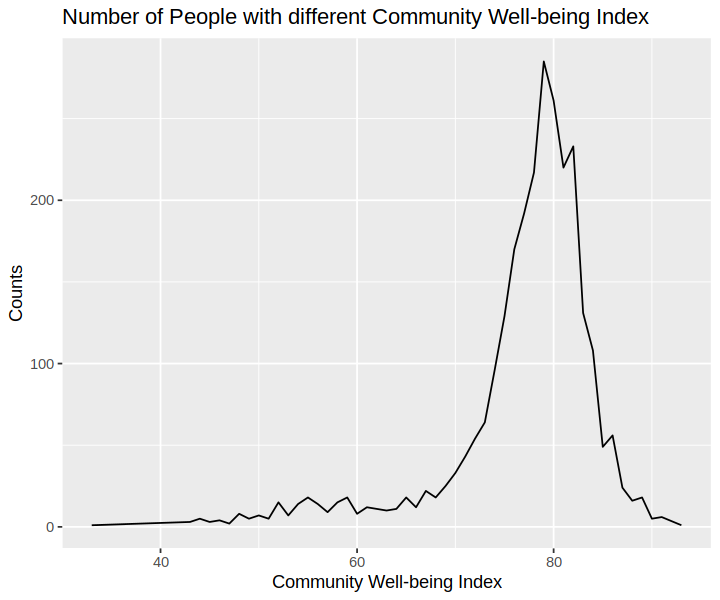

In [29]:
set.seed(1234)
options(repr.plot.width=6, repr.plot.height=5)
# splitting data into training data and testing data
database_split <- initial_split(database, prop = 0.75,strata = CSD_Code_2021)
database_train <- training(database_split)
database_test <- testing(database_split)

# count the number of patients with different ages
count_income <- database_train |>
             group_by(Income_2021) |>
             summarize(count = n())

hist_income <- ggplot(count_income, aes(x = Income_2021, y = count)) +
            geom_line() +
            xlab("Income Level") +
            ylab("Counts") +
            ggtitle("Number of People in different Income Level")


count_edu <- database_train |>
             group_by(Education_2021) |>
             summarize(count = n())

hist_edu <- ggplot(count_edu, aes(x = Education_2021, y = count)) +
            geom_line() +
            xlab("Education Level") +
            ylab("Counts") +
            ggtitle("Number of People in different Education Level")


count_labour <- database_train |>
             group_by(Labour_Force_Activity_2021) |>
             summarize(count = n())

hist_edu <- ggplot(count_labour, aes(x = Labour_Force_Activity_2021, y = count)) +
            geom_line() +
            xlab("Labour Force Activity") +
            ylab("Counts") +
            ggtitle("Number of People in different Labour Force Activity Level")


count_house <- database_train |>
             group_by(Housing_2021) |>
             summarize(count = n())

hist_house <- ggplot(count_house, aes(x = Housing_2021, y = count)) +
              geom_line() +
              xlab("Housing Level") +
              ylab("Counts") +
              ggtitle("Number of People in Housing Level")

count_cwb <- database_train |>
             group_by(CWB_2021) |>
             summarize(count = n())

hist_cwb <- ggplot(count_cwb, aes(x = CWB_2021, y = count)) +
            geom_line() +
            xlab("Community Well-being Index") +
            ylab("Counts") +
            ggtitle("Number of People with different Community Well-being Index")


hist_income
hist_edu
hist_edu
hist_house
hist_cwb

In [30]:
#count the average value of variables
group_mean <- database_train |>
      summarize(across(Income_2021:CWB_2021, mean)) 

print("Table 3: Mean values across Income, Education, Housing and Labour Force")
head(group_mean)

[1] "Table 3: Mean values across Income, Education, Housing and Labour Force"


Income_2021 Education_2021 Housing_2021 Labour_Force_Activity_2021 CWB_2021
1 75.90188    56.52342       92.3246      82.93287                   76.92143

In [31]:
## Description of the variables

## Model


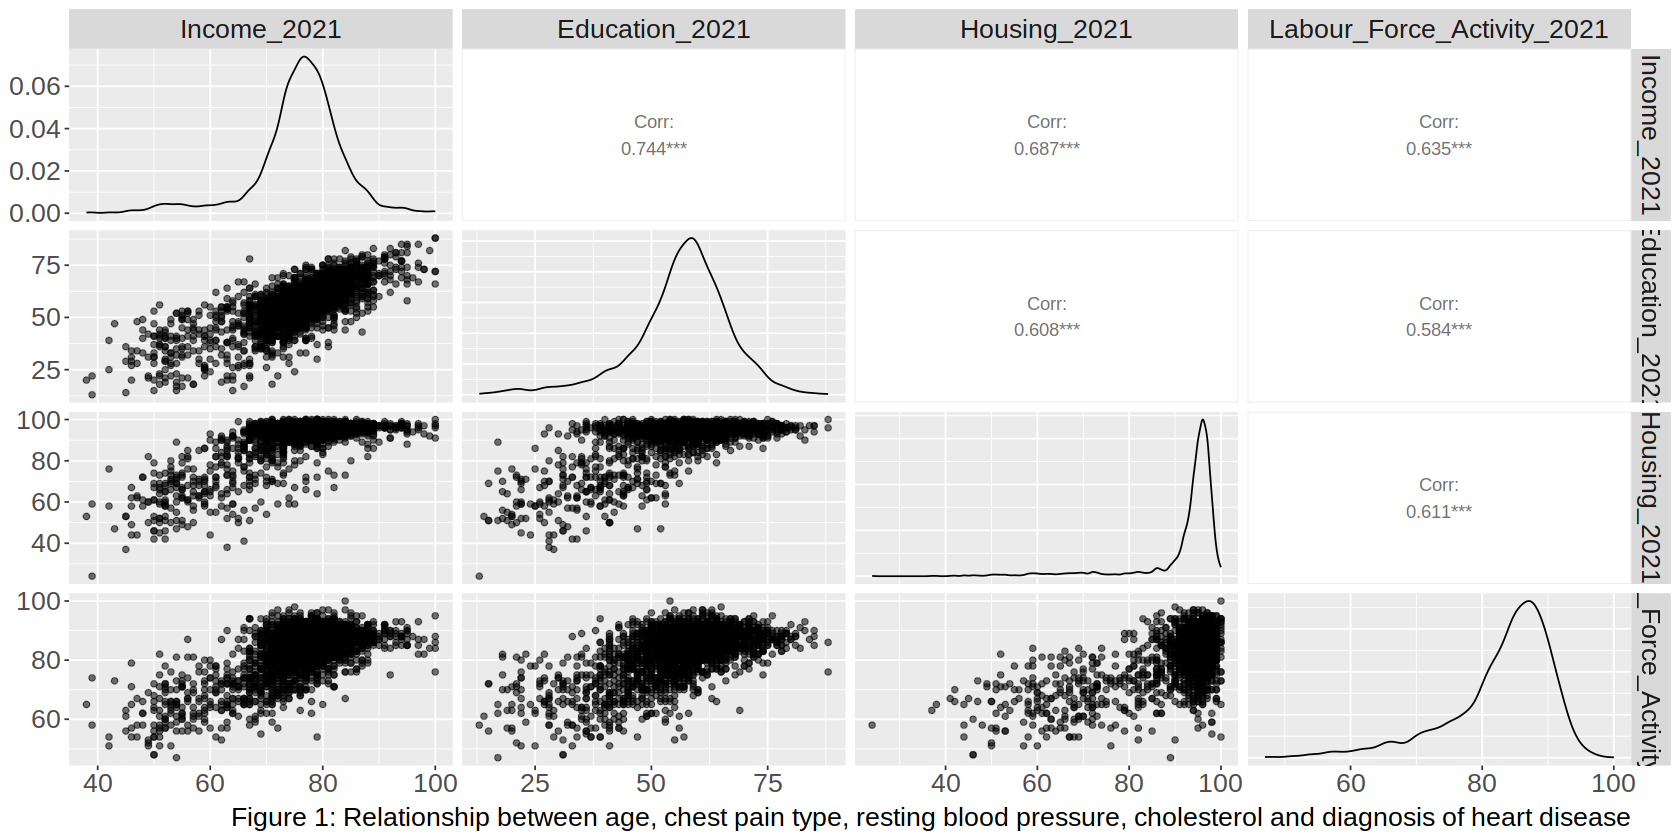

In [32]:
# Select and mutate to obtain a clean data frame, and only see variables we are insterested
database_train_selected <- database_train |>
                           select(Income_2021:Labour_Force_Activity_2021) 

# Use ggpair to draw plots of relationship between variables
options(repr.plot.width = 14, repr.plot.height = 7)
graph <- database_train_selected |>
         ggpairs(mapping = aes(alpha = 0.4)) +
        labs(caption = "Figure 1: Relationship between age, chest pain type, resting blood pressure, cholesterol and diagnosis of heart disease") +
         theme(text = element_text(size = 20))
graph

